# Resumão de Aplicação dos conceitos básicos de Machine Learning

In [1]:
%matplotlib inline
from pprint import pprint

import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
RAND_SEED = 42
np.random.seed(RAND_SEED)

In [3]:
df = pd.read_csv("states_all.csv")

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,1492.0,2.004434e+03,7.393983e+00,1992.000000,1.998000e+03,2.004000e+03,2.011000e+03,2.017000e+03
ENROLL,1229.0,9.159308e+05,1.065280e+06,43866.000000,2.583140e+05,6.483130e+05,1.014528e+06,6.307022e+06
TOTAL_REVENUE,1280.0,9.092082e+06,1.174519e+07,465650.000000,2.186305e+06,5.079546e+06,1.085985e+07,8.921726e+07
FEDERAL_REVENUE,1280.0,7.663723e+05,1.145242e+06,31020.000000,1.893540e+05,4.033765e+05,8.289660e+05,9.990221e+06
STATE_REVENUE,1280.0,4.216553e+06,5.543072e+06,0.000000,1.153097e+06,2.537074e+06,5.080939e+06,5.090457e+07
LOCAL_REVENUE,1280.0,4.109157e+06,5.482971e+06,22093.000000,7.158345e+05,2.055780e+06,4.768680e+06,3.610526e+07
TOTAL_EXPENDITURE,1280.0,9.196681e+06,1.197813e+07,481665.000000,2.165404e+06,5.234506e+06,1.074519e+07,8.532013e+07
INSTRUCTION_EXPENDITURE,1280.0,4.762966e+06,6.293004e+06,265549.000000,1.168032e+06,2.657452e+06,5.568028e+06,4.396452e+07
SUPPORT_SERVICES_EXPENDITURE,1280.0,2.680331e+06,3.353349e+06,139963.000000,6.357900e+05,1.525406e+06,3.229651e+06,2.605802e+07
OTHER_EXPENDITURE,1229.0,4.292046e+05,5.340693e+05,11541.000000,1.028310e+05,2.715960e+05,5.186000e+05,3.995951e+06


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PRIMARY_KEY                   1492 non-null   object 
 1   STATE                         1492 non-null   object 
 2   YEAR                          1492 non-null   int64  
 3   ENROLL                        1229 non-null   float64
 4   TOTAL_REVENUE                 1280 non-null   float64
 5   FEDERAL_REVENUE               1280 non-null   float64
 6   STATE_REVENUE                 1280 non-null   float64
 7   LOCAL_REVENUE                 1280 non-null   float64
 8   TOTAL_EXPENDITURE             1280 non-null   float64
 9   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 10  SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 11  OTHER_EXPENDITURE             1229 non-null   float64
 12  CAPITAL_OUTLAY_EXPENDITURE    1280 non-null   float64
 13  GRA

In [6]:
df.corr()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,1.000000,0.033393,0.236281,0.275597,0.220017,0.226148,0.229592,0.228180,0.247312,0.194895,...,0.029005,0.042773,0.108582,0.030393,0.070147,0.037877,0.691727,0.490964,0.327086,0.201923
ENROLL,0.033393,1.000000,0.914077,0.893755,0.914520,0.846918,0.915009,0.880823,0.917537,0.953080,...,0.996449,0.997256,0.982295,0.997033,0.995357,0.997681,-0.005537,-0.037240,-0.067467,-0.006419
TOTAL_REVENUE,0.236281,0.914077,1.000000,0.928324,0.972590,0.964969,0.999024,0.990375,0.994848,0.947041,...,0.896201,0.909801,0.939828,0.898374,0.927197,0.906995,0.163007,0.111477,0.066415,0.020289
FEDERAL_REVENUE,0.275597,0.893755,0.928324,1.000000,0.920741,0.848877,0.928646,0.893734,0.931638,0.947427,...,0.868741,0.882337,0.924164,0.870636,0.901819,0.880561,0.123957,0.045111,-0.038412,0.010612
STATE_REVENUE,0.220017,0.914520,0.972590,0.920741,1.000000,0.880126,0.970056,0.954485,0.968782,0.950550,...,0.901051,0.913023,0.946841,0.902103,0.931911,0.909988,0.126164,0.070389,0.009954,0.017162
LOCAL_REVENUE,0.226148,0.846918,0.964969,0.848877,0.880126,1.000000,0.965373,0.969880,0.957090,0.869894,...,0.827283,0.841469,0.862819,0.830477,0.855557,0.838258,0.195823,0.158581,0.140875,0.023968
TOTAL_EXPENDITURE,0.229592,0.915009,0.999024,0.928646,0.970056,0.965373,1.000000,0.991347,0.993314,0.946110,...,0.895994,0.909858,0.938650,0.898292,0.926939,0.906932,0.158988,0.108318,0.063147,0.022551
INSTRUCTION_EXPENDITURE,0.228180,0.880823,0.990375,0.893734,0.954485,0.969880,0.991347,1.000000,0.976889,0.909340,...,0.863424,0.876886,0.904203,0.865823,0.894244,0.872927,0.160238,0.112391,0.083314,0.030369
SUPPORT_SERVICES_EXPENDITURE,0.247312,0.917537,0.994848,0.931638,0.968782,0.957090,0.993314,0.976889,1.000000,0.953091,...,0.898693,0.912708,0.945662,0.900891,0.930590,0.910130,0.169020,0.115861,0.065281,0.018656
OTHER_EXPENDITURE,0.194895,0.953080,0.947041,0.947427,0.950550,0.869894,0.946110,0.909340,0.953091,1.000000,...,0.944652,0.953039,0.972466,0.946163,0.963824,0.952564,0.075517,0.011494,-0.029369,0.010578


Colunas com boa correlação:
- year
- total revenue
- local revenue
- total expenditure
- instruction expenditure
- support service expenditure
- avg_math_4_score
- avg_reading_4_score
- avg_reading_8_score

In [7]:
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [8]:
df_dropped = df.loc[:,["STATE","YEAR", "TOTAL_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE", "AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]]

In [9]:
df_dropped.head()

,STATE,YEAR,TOTAL_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,ALABAMA,1992,2678885.0,715680.0,2653798.0,1481703.0,735036.0,208.327876,252.187522,207.963517,NaN
1,ALASKA,1992,1049591.0,222100.0,972488.0,498362.0,350902.0,NaN,NaN,NaN,258.859712
2,ARIZONA,1992,3258079.0,1590376.0,3401580.0,1435908.0,1007732.0,215.253932,265.366278,206.212716,262.169895
3,ARKANSAS,1992,1711959.0,574603.0,1743022.0,964323.0,483488.0,210.206028,256.312090,208.634458,264.619665
4,CALIFORNIA,1992,26260025.0,7641041.0,27138832.0,14358922.0,8520926.0,208.398961,260.892247,196.764414,NaN


In [10]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         1492 non-null   object 
 1   YEAR                          1492 non-null   int64  
 2   TOTAL_REVENUE                 1280 non-null   float64
 3   LOCAL_REVENUE                 1280 non-null   float64
 4   TOTAL_EXPENDITURE             1280 non-null   float64
 5   INSTRUCTION_EXPENDITURE       1280 non-null   float64
 6   SUPPORT_SERVICES_EXPENDITURE  1280 non-null   float64
 7   AVG_MATH_4_SCORE              536 non-null    float64
 8   AVG_MATH_8_SCORE              532 non-null    float64
 9   AVG_READING_4_SCORE           533 non-null    float64
 10  AVG_READING_8_SCORE           498 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 128.3+ KB


In [11]:
df_dropped_NA = df_dropped[df_dropped["AVG_MATH_8_SCORE"].notna()]

In [12]:
df_dropped_NA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532 entries, 0 to 1491
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         532 non-null    object 
 1   YEAR                          532 non-null    int64  
 2   TOTAL_REVENUE                 481 non-null    float64
 3   LOCAL_REVENUE                 481 non-null    float64
 4   TOTAL_EXPENDITURE             481 non-null    float64
 5   INSTRUCTION_EXPENDITURE       481 non-null    float64
 6   SUPPORT_SERVICES_EXPENDITURE  481 non-null    float64
 7   AVG_MATH_4_SCORE              532 non-null    float64
 8   AVG_MATH_8_SCORE              532 non-null    float64
 9   AVG_READING_4_SCORE           522 non-null    float64
 10  AVG_READING_8_SCORE           478 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 49.9+ KB


In [13]:
BINS = int(np.sqrt(len(df_dropped_NA.index)))

In [15]:
len(df_dropped_NA.index)

532

In [16]:
BINS

23

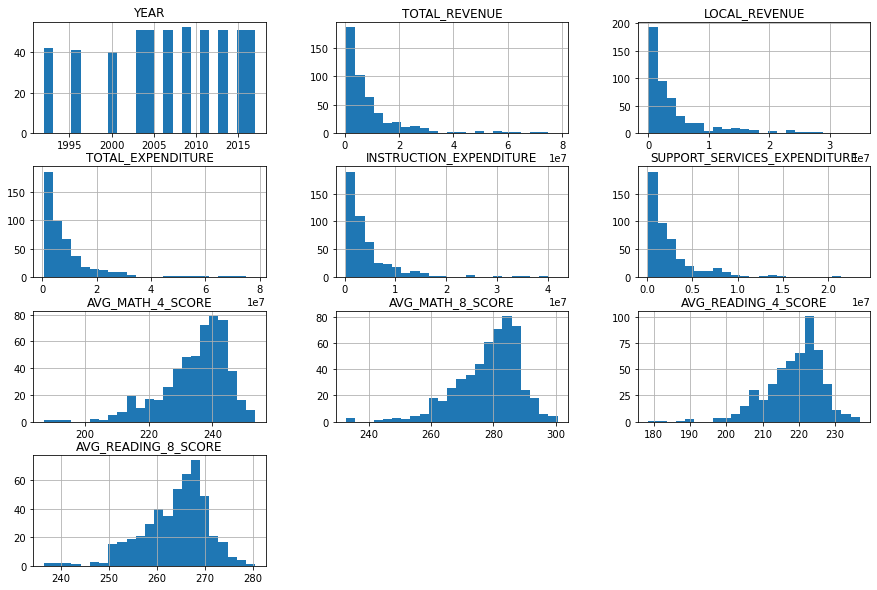

In [17]:
df_dropped_NA.hist(bins=BINS, figsize=(15,10));

<AxesSubplot:ylabel='Frequency'>

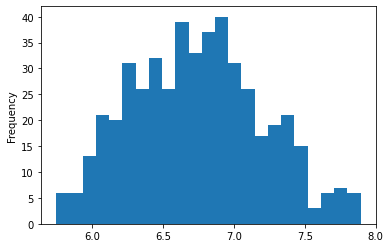

In [18]:
df_dropped_NA["TOTAL_REVENUE"].apply(np.log10).plot.hist(bins = BINS)

<AxesSubplot:ylabel='Frequency'>

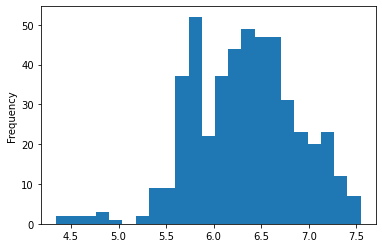

In [19]:
df_dropped_NA["LOCAL_REVENUE"].apply(np.log10).plot.hist(bins = BINS)

In [20]:
df_dropped_NA[df_dropped_NA['LOCAL_REVENUE'] < 10**5].loc[:, 'LOCAL_REVENUE'].count()

10

<AxesSubplot:ylabel='Frequency'>

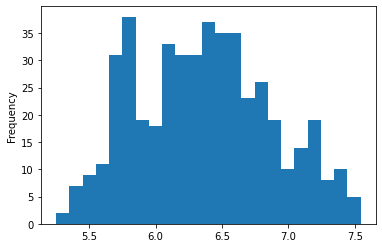

In [21]:
(df_dropped_NA[df_dropped_NA['LOCAL_REVENUE'] >= 10**5].loc[:, 'LOCAL_REVENUE']).apply(np.log10).plot.hist(bins = BINS)

<AxesSubplot:ylabel='Frequency'>

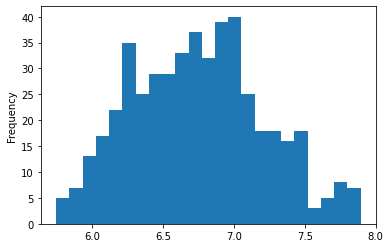

In [22]:
df_dropped_NA["TOTAL_EXPENDITURE"].apply(np.log10).plot.hist(bins = BINS)

<AxesSubplot:ylabel='Frequency'>

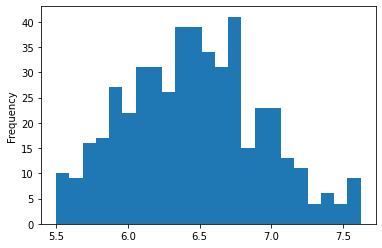

In [23]:
df_dropped_NA["INSTRUCTION_EXPENDITURE"].apply(np.log10).plot.hist(bins = BINS)

<AxesSubplot:ylabel='Frequency'>

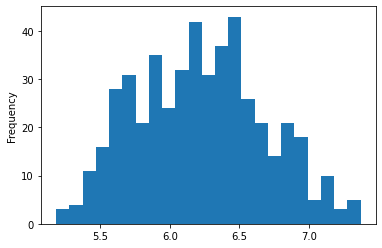

In [24]:
df_dropped_NA["SUPPORT_SERVICES_EXPENDITURE"].apply(np.log10).plot.hist(bins = BINS)

In [25]:
df_dropped_NA[df_dropped_NA['AVG_MATH_4_SCORE'] < 200].loc[:, 'AVG_MATH_4_SCORE'].count()

3

In [26]:
df_dropped_NA[df_dropped_NA['AVG_MATH_8_SCORE'] < 240].loc[:, 'AVG_MATH_8_SCORE'].count()

3

In [27]:
df_dropped_NA[df_dropped_NA['AVG_READING_4_SCORE'] < 195].loc[:, 'AVG_READING_4_SCORE'].count()

5

In [28]:
df_dropped_NA[df_dropped_NA['AVG_READING_8_SCORE'] < 245].loc[:, 'AVG_READING_8_SCORE'].count()

7

**Iniciando os cortes e normalizações**

In [29]:
df_dropped_NA.columns

Index(['STATE', 'YEAR', 'TOTAL_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
       'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE',
       'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE',
       'AVG_READING_8_SCORE'],
      dtype='object')

In [30]:
#df_filtered é tipo o view. Etão mexe no df original
idx = (df_dropped_NA['LOCAL_REVENUE'] >= 10**5)\
    & (df_dropped_NA['AVG_MATH_4_SCORE'] >= 200) \
    & (df_dropped_NA['AVG_MATH_8_SCORE'] >= 240) \
    & (df_dropped_NA['AVG_READING_4_SCORE'] >= 195) \
    & (df_dropped_NA['AVG_READING_8_SCORE'] >= 245) 
df_filtered = df_dropped_NA[idx].copy()
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403 entries, 2 to 1228
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATE                         403 non-null    object 
 1   YEAR                          403 non-null    int64  
 2   TOTAL_REVENUE                 403 non-null    float64
 3   LOCAL_REVENUE                 403 non-null    float64
 4   TOTAL_EXPENDITURE             403 non-null    float64
 5   INSTRUCTION_EXPENDITURE       403 non-null    float64
 6   SUPPORT_SERVICES_EXPENDITURE  403 non-null    float64
 7   AVG_MATH_4_SCORE              403 non-null    float64
 8   AVG_MATH_8_SCORE              403 non-null    float64
 9   AVG_READING_4_SCORE           403 non-null    float64
 10  AVG_READING_8_SCORE           403 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 37.8+ KB


In [31]:
df_filtered['TOTAL_REVENUE'] = df_filtered['TOTAL_REVENUE'].apply(np.log10)
df_filtered['LOCAL_REVENUE'] = df_filtered['LOCAL_REVENUE'].apply(np.log10)
df_filtered['TOTAL_EXPENDITURE'] = df_filtered['TOTAL_EXPENDITURE'].apply(np.log10)
df_filtered['INSTRUCTION_EXPENDITURE'] = df_filtered['INSTRUCTION_EXPENDITURE'].apply(np.log10)
df_filtered['SUPPORT_SERVICES_EXPENDITURE'] = df_filtered['SUPPORT_SERVICES_EXPENDITURE'].apply(np.log10)

In [32]:
BINS = int(np.sqrt(len(df_filtered.index)))

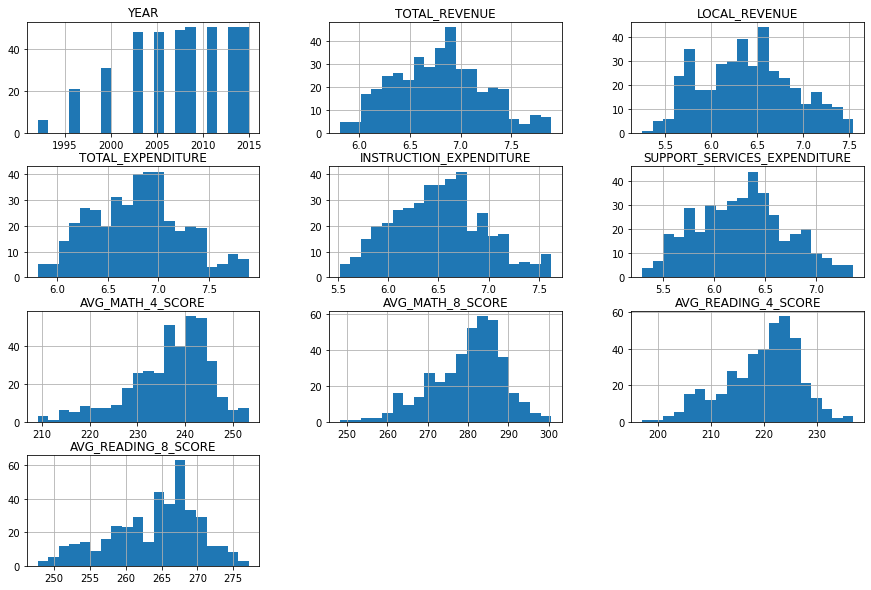

In [33]:
df_filtered.hist(bins=BINS, figsize=(15,10));

## Separando os valores em treino e teste:

Vamos separar os valores em treino e teste utilizando a separação estratificada

In [34]:
y = df_filtered.loc[:,"AVG_MATH_8_SCORE"]
X = df_filtered.drop(["AVG_MATH_8_SCORE"], axis=1)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,                  
    test_size=0.2,
    random_state=RAND_SEED,
    stratify=X["STATE"]
)

In [36]:
X_train_num = X_train.drop(["STATE"], axis=1)
X_train_cat = X_train.loc[:,"STATE"]

In [37]:
meu_imputer = SimpleImputer(strategy='median')
meu_scaler = StandardScaler()

num_pipeline = Pipeline([
    ('imputer', meu_imputer),
    ('std_scaler', meu_scaler),
])

meu_one_hot_encoder = OneHotEncoder(sparse=False)

cat_pipeline = Pipeline([
    ('cat_encoder', meu_one_hot_encoder),
])

num_attribs = list(X_train_num)
cat_attribs = ['STATE']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs),
])

In [38]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared[:5]

array([[-1.31562961,  0.30816959,  0.35981008,  0.3030157 ,  0.24946339,
         0.24397074, -0.2533023 ,  0.33174129,  0.50661948,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ],
       [ 1.00711419,  1.44408463,  1.59000319,  1.43588476,  1.49570017,
         1.53090335,  1.19589952,  1.32003436,  0.86846773,  0.

## Aplicando os modelos:

Depois de possuirmos nosso treino tranformado, ele está preparado para poder ser aplicado nos modelos.

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [40]:
#Aplicando modelo Linear
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

LinearRegression()

In [41]:
#Aplicando Regressor de Árvore de Decisão
tree_reg = DecisionTreeRegressor(random_state=RAND_SEED)
tree_reg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(random_state=42)

In [42]:
#Aplicando Regressor de Floresta Randômica
forest_reg = RandomForestRegressor(n_estimators=10, random_state=RAND_SEED)
forest_reg.fit(X_train_prepared, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

### Cross Validation

Vamos agora aplicar a cross validation de todos os modelos aplicados acima com a intenção de identificar aquele com melhor score.

In [43]:
from sklearn.model_selection import cross_val_score

In [44]:
def display_scores(scores):
    print('Scores:', scores.round(decimals=2))
    print('Mean:', scores.mean())
    print('Standard deviation:', scores.std())

In [45]:
#CrossVal Linear Regression
lin_scores = cross_val_score(
    lin_reg,  # modelo
    X_train_prepared,  # X_train
    y_train,  # y_train
    scoring='neg_mean_squared_error',  # metrica de interesse
    cv=10,  # Quantas partições eu quero
    n_jobs=-1,  # Use todos os cores da maquina!
)

lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [2.63 2.2  2.08 2.79 2.82 2.06 2.46 2.59 2.18 2.28]
Mean: 2.409223945619649
Standard deviation: 0.2719211082981303


In [49]:
lin_scores

array([-6.90103234, -4.85692909, -4.32001159, -7.79852745, -7.96518548,
       -4.25533066, -6.02723026, -6.69870168, -4.75211632, -5.20794624])

In [46]:
tree_scores = cross_val_score(
    tree_reg,
    X_train_prepared,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
)

tree_rmse_scores = np.sqrt(-tree_scores)

display_scores(tree_rmse_scores)

Scores: [3.99 4.89 4.35 4.37 3.35 4.75 4.08 5.03 3.44 4.69]
Mean: 4.294787151303974
Standard deviation: 0.5491057108391437


In [47]:
forest_scores = cross_val_score(
    forest_reg,
    X_train_prepared,
    y_train,
    scoring='neg_mean_squared_error',
    cv=10,
    n_jobs=-1,
)

forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [3.   3.79 4.56 3.99 2.63 3.27 2.78 4.05 2.94 2.98]
Mean: 3.399656149723481
Standard deviation: 0.6172273643311808


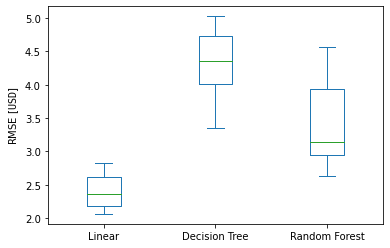

In [48]:
pd.DataFrame({
    'Linear': lin_rmse_scores,
    'Decision Tree': tree_rmse_scores,
    'Random Forest': forest_rmse_scores,
}).plot.box(
    xlabel='Regressor',
    ylabel=r'RMSE $[\mathtt{USD}]$',
    figsize=(6, 4),
);